<a href="https://colab.research.google.com/github/ChaelinL/Deeplearning_for_everyone/blob/main/18%EC%9E%A5_%EC%8B%A4%EC%8A%B5(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM을 이용해 로이터 뉴스 카테고리 분석하기

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터를 학습셋, 테스트셋으로 나누기
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)  # num_words -> 빈도가 1~1000에 해당하는 단어만 선택해 불러오기

# 데이터 확인
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

2110848/2110848 [==============================] - 0s 0us/step
46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [3]:
# 단어의 수 맞춰주기
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

# 원-핫 인코딩 처리하기
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
# 모델 구조 설정하기
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))  # LSTM의 활성화 함수는 주로 tanh를 사용
model.add(Dense(46, activation='softmax'))

# 모델 실행 옵션 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단 설정하기
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [5]:
# 모델 실행
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

# 테스트 정확도 출력
print(f"Test Accuracy: {round(model.evaluate(X_test, y_test)[1], 4)}")

Epoch 1/200
450/450 [==============================] - 31s 54ms/step - loss: 2.2001 - accuracy: 0.4378 - val_loss: 1.8922 - val_accuracy: 0.5067
Epoch 2/200
450/450 [==============================] - 7s 16ms/step - loss: 1.7482 - accuracy: 0.5538 - val_loss: 1.7546 - val_accuracy: 0.5316
Epoch 3/200
450/450 [==============================] - 5s 10ms/step - loss: 1.6296 - accuracy: 0.5844 - val_loss: 1.6189 - val_accuracy: 0.5855
Epoch 4/200
450/450 [==============================] - 4s 10ms/step - loss: 1.4796 - accuracy: 0.6214 - val_loss: 1.5261 - val_accuracy: 0.6238
Epoch 5/200
450/450 [==============================] - 6s 13ms/step - loss: 1.3305 - accuracy: 0.6648 - val_loss: 1.3597 - val_accuracy: 0.6492
Epoch 6/200
450/450 [==============================] - 4s 10ms/step - loss: 1.2100 - accuracy: 0.6971 - val_loss: 1.3199 - val_accuracy: 0.6647
Epoch 7/200
450/450 [==============================] - 5s 11ms/step - loss: 1.0886 - accuracy: 0.7239 - val_loss: 1.2125 - val_accuracy

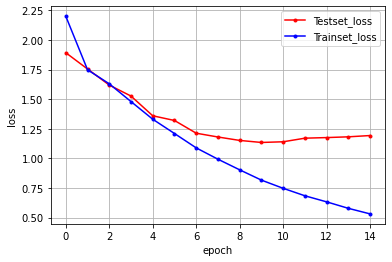

In [7]:
# 검증셋과 학습셋의 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 시각화
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()